In [17]:

# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_excel(f"{data_dir}/atl_fed/wage-growth-data.xlsx", sheet_name = 'Job Switcher', skiprows=2, header=0)
cpi = pd.read_csv(f"{data_dir}/CPI/CPIAUCSL.csv")


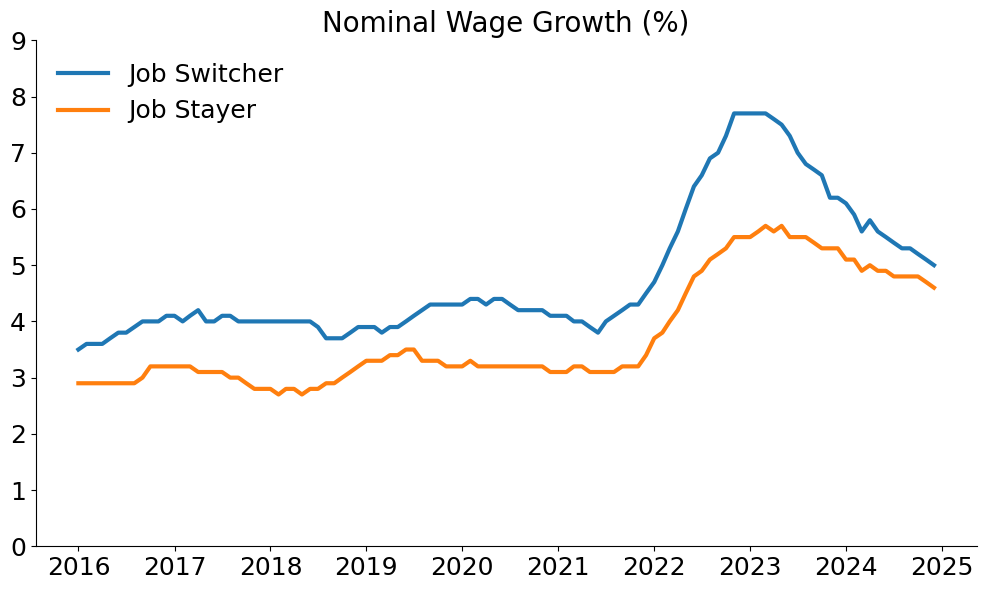

In [22]:


df = pd.DataFrame(data)

# Convert the date column to datetime objects
df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"])

# Replace placeholder '.' values with NaN
df.replace(".", float("nan"), inplace=True)

# Convert the numeric columns to float
df["Job Stayer"] = pd.to_numeric(df["Job Stayer"], errors="coerce")
df["Job Switcher"] = pd.to_numeric(df["Job Switcher"], errors="coerce")

# Set the date column as the index
df.set_index("Unnamed: 0", inplace=True)

# Filter the dataframe to include only data from 2016 to 2024.
start_date = "2016-01-01"
end_date = "2024-12-31"
filtered_df = df.loc[start_date:end_date]

plt.figure(figsize=(10, 6))

# Plot the data with thicker lines for a more professional look
plt.plot(filtered_df.index, filtered_df["Job Switcher"], label="Job Switcher", linewidth=3)
plt.plot(filtered_df.index, filtered_df["Job Stayer"], label="Job Stayer", linewidth=3)

# Enhance the title and axis labels with increased font sizes
plt.title("Nominal Wage Growth (%)", fontsize=20)
plt.ylim(0, 9)

# Disable the legend frame for a cleaner appearance and increase legend font size
plt.legend(fontsize=18, frameon=False)

# Customize the axes: remove the top and right spines and increase tick label sizes for readability
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=18)

plt.tight_layout()
plt.savefig(f"{output_dir}/figures/atl_fed_switcher_stayer_gap.pdf")
plt.show()
